In [79]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

Data taken from "https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul/data"

The idea is to make a model that can predict the remaining useful life (RUL) of a cell given a few different parameters. I go through uploading the model, splitting, scaling, then training a model, with a helpful graph for comparison. 

First, we need to get our X and y data and split it for training and testing

In [119]:
df = pd.read_csv('Battery_RUL.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we will scale the X data. We will also scale the y data because it has a wide range.

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

Next, let's make our model!

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_scaled, y_train_scaled, epochs=50, validation_split=0.2, verbose=0)

Let's see how our model did

In [127]:
# Evaluate on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)

print("Loss (MSE):", loss)
print("MAE:", mae)

Loss (MSE): 4800721.0
MAE: 967.4271240234375


To help visualize our model's performance, we will graph predicted RUL vs true RUL. 

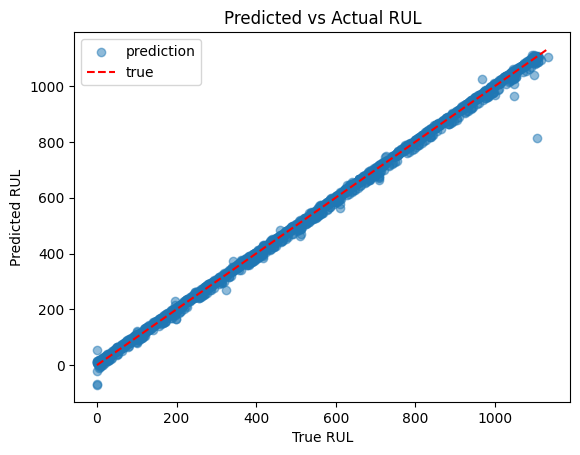

In [128]:
import matplotlib.pyplot as plt

y_pred_scaled = model.predict(X_test_scaled, verbose=0)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

plt.scatter(y_test, y_pred, alpha=0.5, label='prediction')
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("Predicted vs Actual RUL")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', label='true')  # ideal prediction line
plt.legend()
plt.show()

As you can see, the model is reasonably predicting the true RULs!